# A simple example
In this notebook, we show you how to model and solve a simple flexible job shop problem with PyJobShop.

A scheduling problem consists of three main elements:
- **Machine**: a machine is a unary resource that can process an operation.
- **Operation**: an operation is a processing task that needs to be completed.
- **Job**: this represents the collection of operations that need to be performed, as is used to measure performance such as completion times or tardiness.

The Flexible Job Shop Problem (FJSP) consists of a set of jobs, each of which is composed of a sequence of operations. 
These operations need to be processed on a set of machines and each operation can be processed by more than one machine. 
The main goal is usually to minimize the makespan.

Let's consider a simple example from [Google OR-Tools](https://github.com/google/or-tools/blob/master/examples/python/flexible_job_shop_sat.py).

In [36]:
data = [  # task = (processing_time, machine_id)
    [  # Job 0
        [(3, 0), (1, 1), (5, 2)],  # task 0 with 3 alternatives
        [(2, 0), (4, 1), (6, 2)],  # task 1 with 3 alternatives
        [(2, 0), (3, 1), (1, 2)],  # task 2 with 3 alternatives
    ],
    [  # Job 1
        [(2, 0), (3, 1), (4, 2)],
        [(1, 0), (5, 1), (4, 2)],
        [(2, 0), (1, 1), (4, 2)],
    ],
    [  # Job 2
        [(2, 0), (1, 1), (4, 2)],
        [(2, 0), (3, 1), (4, 2)],
        [(3, 0), (1, 1), (5, 2)],
    ],
]

NUM_MACHINES = 3

Here we have three jobs. Each job consists of a list of tuples, each of which represents an operation, and the first index denotes the machine that can process it and the second 

In [37]:
from pyjobshop import Model

In [38]:
m = Model()

In [40]:
machines = [
    m.add_machine(name=f"Machine {idx}") for idx in range(NUM_MACHINES)
]

for job_data in data:
    job = m.add_job()
    operations = []

    for operation_data in job_data:
        operation = m.add_operation()
        operations.append(operation)

        for duration, machine_idx in operation_data:
            m.add_processing_time(machines[machine_idx], operation, duration)

    for idx in range(len(operations) - 1):
        m.add_timing_precedence(operations[idx], operations[idx + 1])

    m.assign_job_operations(job, operations)

Now let's solve the model.

In [41]:
result = m.solve()

Now let's plot the solution.

In [42]:
from pyjobshop import plot, result2solution

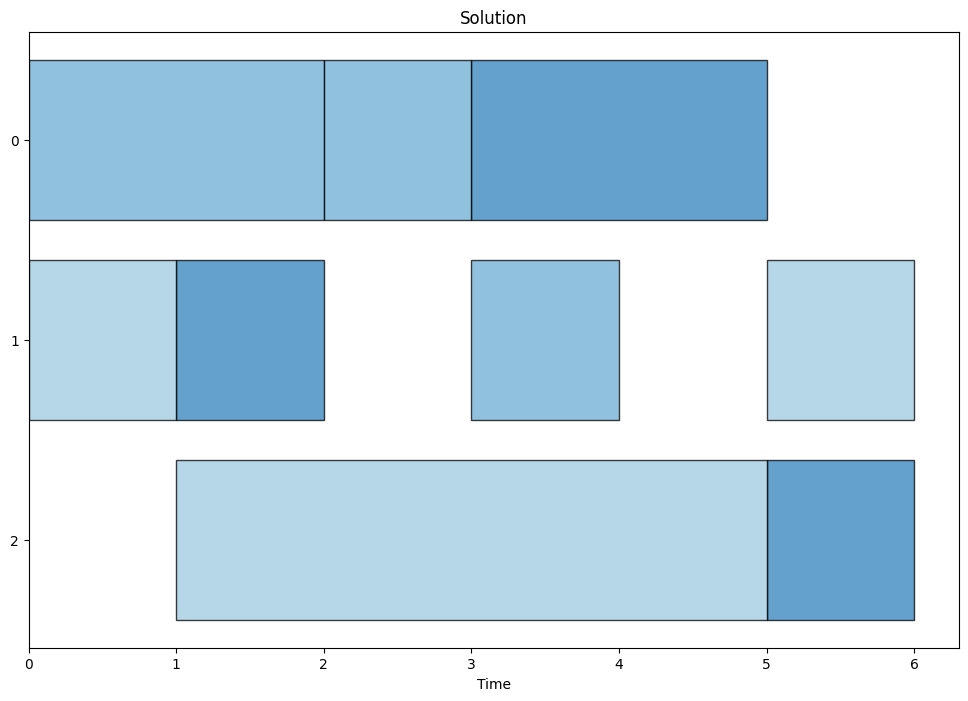

In [43]:
data = m.data()
solution = result2solution(data, result)

plot(data, solution)